1. The LASSO and Boosting for Regression

(a) Download the Communities and Crime data1
from https://archive.ics.uci.
edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as
the training set and the rest as the test set.

In [1]:
import pandas as pd
import numpy as np
column_name=[]
for line in open('../data/Homework 4 Data/communities.names'):
    if '@attribute' in line:
        sep=line.split(' ')
        column_name.append(sep[1])
data = pd.read_csv('../data/Homework 4 Data/communities.data', header=None, names=column_name)
train, test = data[:1495], data[1495:]
# print(train, test)
train

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1490      6      ?         ?     Hillsboroughtown     8        0.00   
1491      6      ?         ?           Orangecity     8        0.16   
1492     13      ?         ?         Waycrosscity     8        0.01   
1493     39     85     49056           Mentorcity     8        0.06   
1494     34     17     79610      WestNewYorktown     8        0.05   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1490           0.59          0.01          0.69          1.00  ...      0.02   
1491           0.62          0.03          0.74          0.48  ...      0.07   
1492           0.36          0.95          0.24          0.03  ...      0.03   
1493           0.53          0.01          0.98          0.05  ...      0.08   
1494           0.43          0.08          0.65          0.12  ...      0.00   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1490     0.14            0.22          ?              ?                    ?   
1491     0.40            0.14       0.07           0.05                 0.85   
1492     0.12            0.01          ?              ?                    ?   
1493     0.15            0.02          ?              ?                    ?   
1494     1.00            1.00          0           0.01                 0.77   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1490                    ?                 0.00                ?   
1491                  0.5                 0.61             0.19   
1492                    ?                 0.00                ?   
1493                    ?                 0.00                ?   
1494                    0                 0.51             0.18   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1490                 0.03  
1491                 0.20  
1492                 0.30  
1493                 0.03  
1494                 0.23  

[1495 rows x 128 columns]

(b) The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features.

In [2]:
# drop nonpredictive
data = data.drop(['state'], axis=1)
data = data.drop(['county'], axis=1)
data = data.drop(['community'], axis=1)
data = data.drop(['communityname'], axis=1)
data = data.drop(['fold'], axis=1)
data=data.replace('?',np.nan)
data

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20       0.06           0.04   
1         0.02     0.12            0.45        NaN            NaN   
2         0.01     0.21            0.02        NaN            NaN   
3         0.02     0.39            0.28        NaN            NaN   
4         0.04     0.09            0.02        NaN            NaN   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05        NaN            NaN   
1990      0.02     0.37            0.20        NaN            NaN   
1991      0.08     0.32            0.18       0.08           0.06   
1992      0.03     0.38            0.33       0.02           0.02   
1993      0.11     0.30            0.05       0.08           0.04   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                     0.9                  0.5                 0.32   
1                     NaN                  NaN                 0.00   
2                     NaN                  NaN                 0.00   
3                     NaN                  NaN                 0.00   
4                     NaN                  NaN                 0.00   
...                   ...                  ...                  ...   
1989                  NaN                  NaN                 0.00   
1990                  NaN                  NaN                 0.00   
1991                 0.78                    0                 0.91   
1992                 0.79                    0                 0.22   
1993                 0.73                  0.5                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0                0.14                 0.20  
1                 NaN                 0.67  
2                 NaN                 0.43  
3                 NaN                 0.12  
4                 NaN                 0.03  
...               ...                  ...  
1989              NaN                 0.09  
1990              NaN                 0.45  
1991             0.28                 0.23  
1992             0.18   

In [3]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed_np=imp.fit_transform(data)
data_imputed_df=pd.DataFrame(data_imputed_np, columns=column_name[5:])
data_imputed_df

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.12     0.26            0.20   0.060000       0.040000   
1         0.02     0.12            0.45   0.163103       0.076708   
2         0.01     0.21            0.02   0.163103       0.076708   
3         0.02     0.39            0.28   0.163103       0.076708   
4         0.04     0.09            0.02   0.163103       0.076708   
...        ...      ...             ...        ...            ...   
1989      0.01     0.28            0.05   0.163103       0.076708   
1990      0.02     0.37            0.20   0.163103       0.076708   
1991      0.08     0.32            0.18   0.080000       0.060000   
1992      0.03     0.38            0.33   0.020000       0.020000   
1993      0.11     0.30            0.05   0.080000       0.040000   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                0.900000             0.500000                 0.32   
1                0.698589             0.440439                 0.00   
2                0.698589             0.440439                 0.00   
3                0.698589             0.440439                 0.00   
4                0.698589             0.440439                 0.00   
...                   ...                  ...                  ...   
1989             0.698589             0.440439                 0.00   
1990             0.698589             0.440439                 0.00   
1991             0.780000             0.000000                 0.91   
1992             0.790000             0.000000                 0.22   
1993             0.730000             0.500000                 1.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0            0.140000                 0.20  
1            0.195078                 0.67  
2            0.195078                 0.43  
3            0.195078                 0.12  
4            0.195078                 0.03  
...               ...                  ...  
1989         0.195078                 0.09  
1990         0.195078                 0.45  
1991         0.280000                 0.23  
1992         0.180000   

(c) Plot a correlation matrix for the features in the data set.

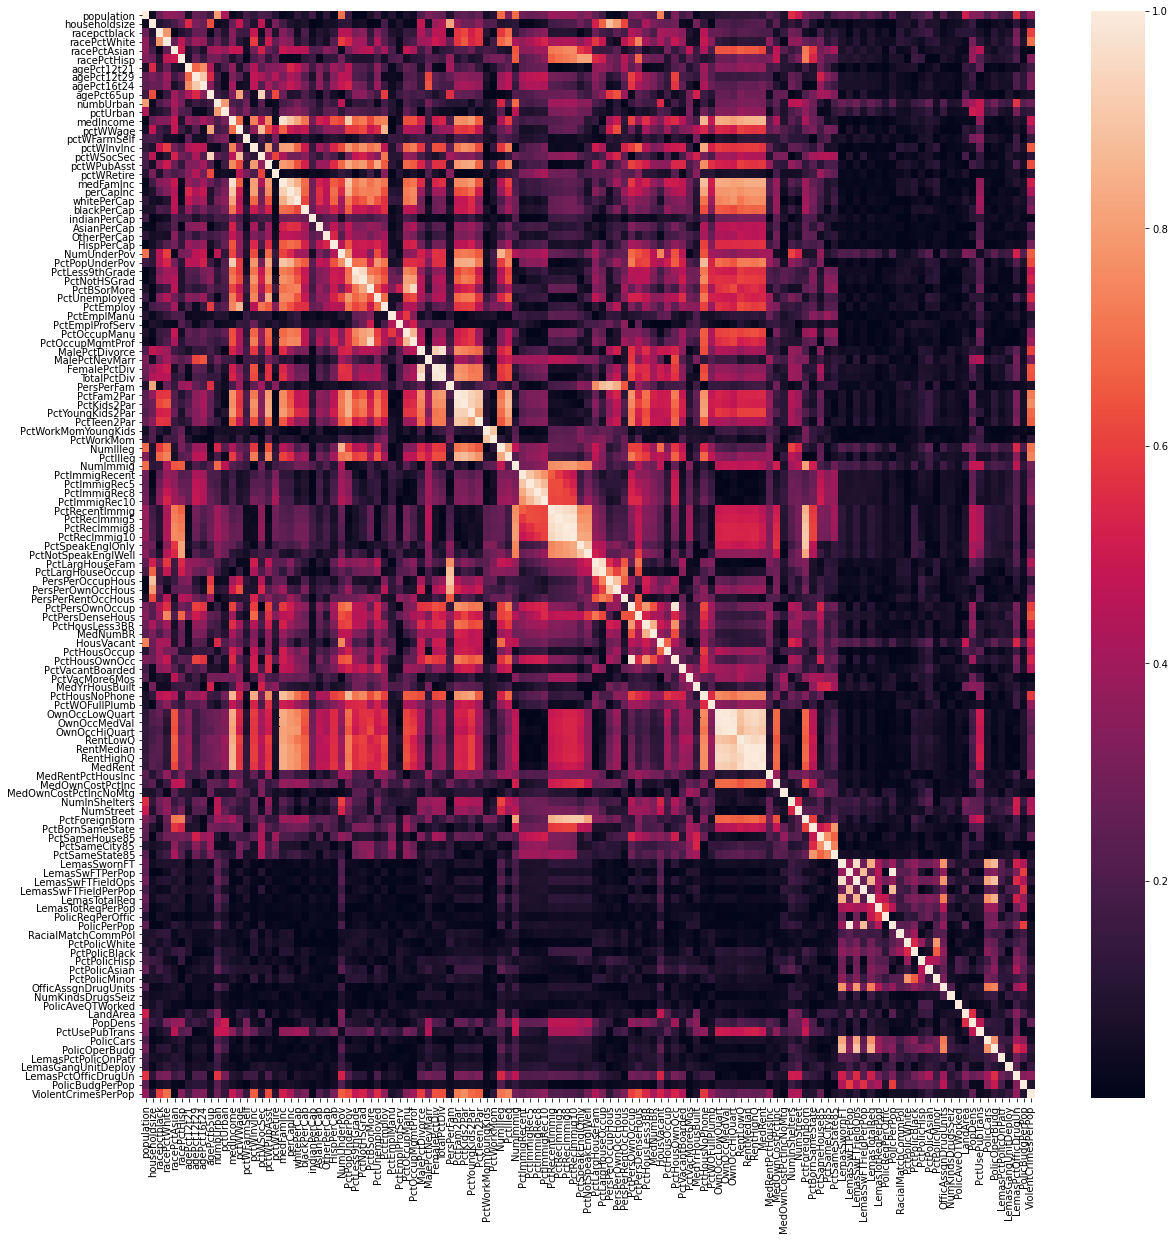

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
matrix=data_imputed_df.corr(method='spearman')
matrix=abs(matrix)
# sns.heatmap(matrix)
plt.figure(figsize=(20,20))
sns.heatmap(matrix, xticklabels=matrix.columns, yticklabels=matrix.columns)
plt.show()

(d) Calculate the Coefficient of Variation CV for each feature, where CV = sm
, in
which s is sample standard deviation and m is sample mean..

In [108]:
cv=data_imputed_df.std()/data_imputed_df.mean()
cv=cv.sort_values(ascending=False)
# cv[:11]

(e) Pick b√
128c features with highest CV , and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?

In [76]:
128**0.5

11.313708498984761

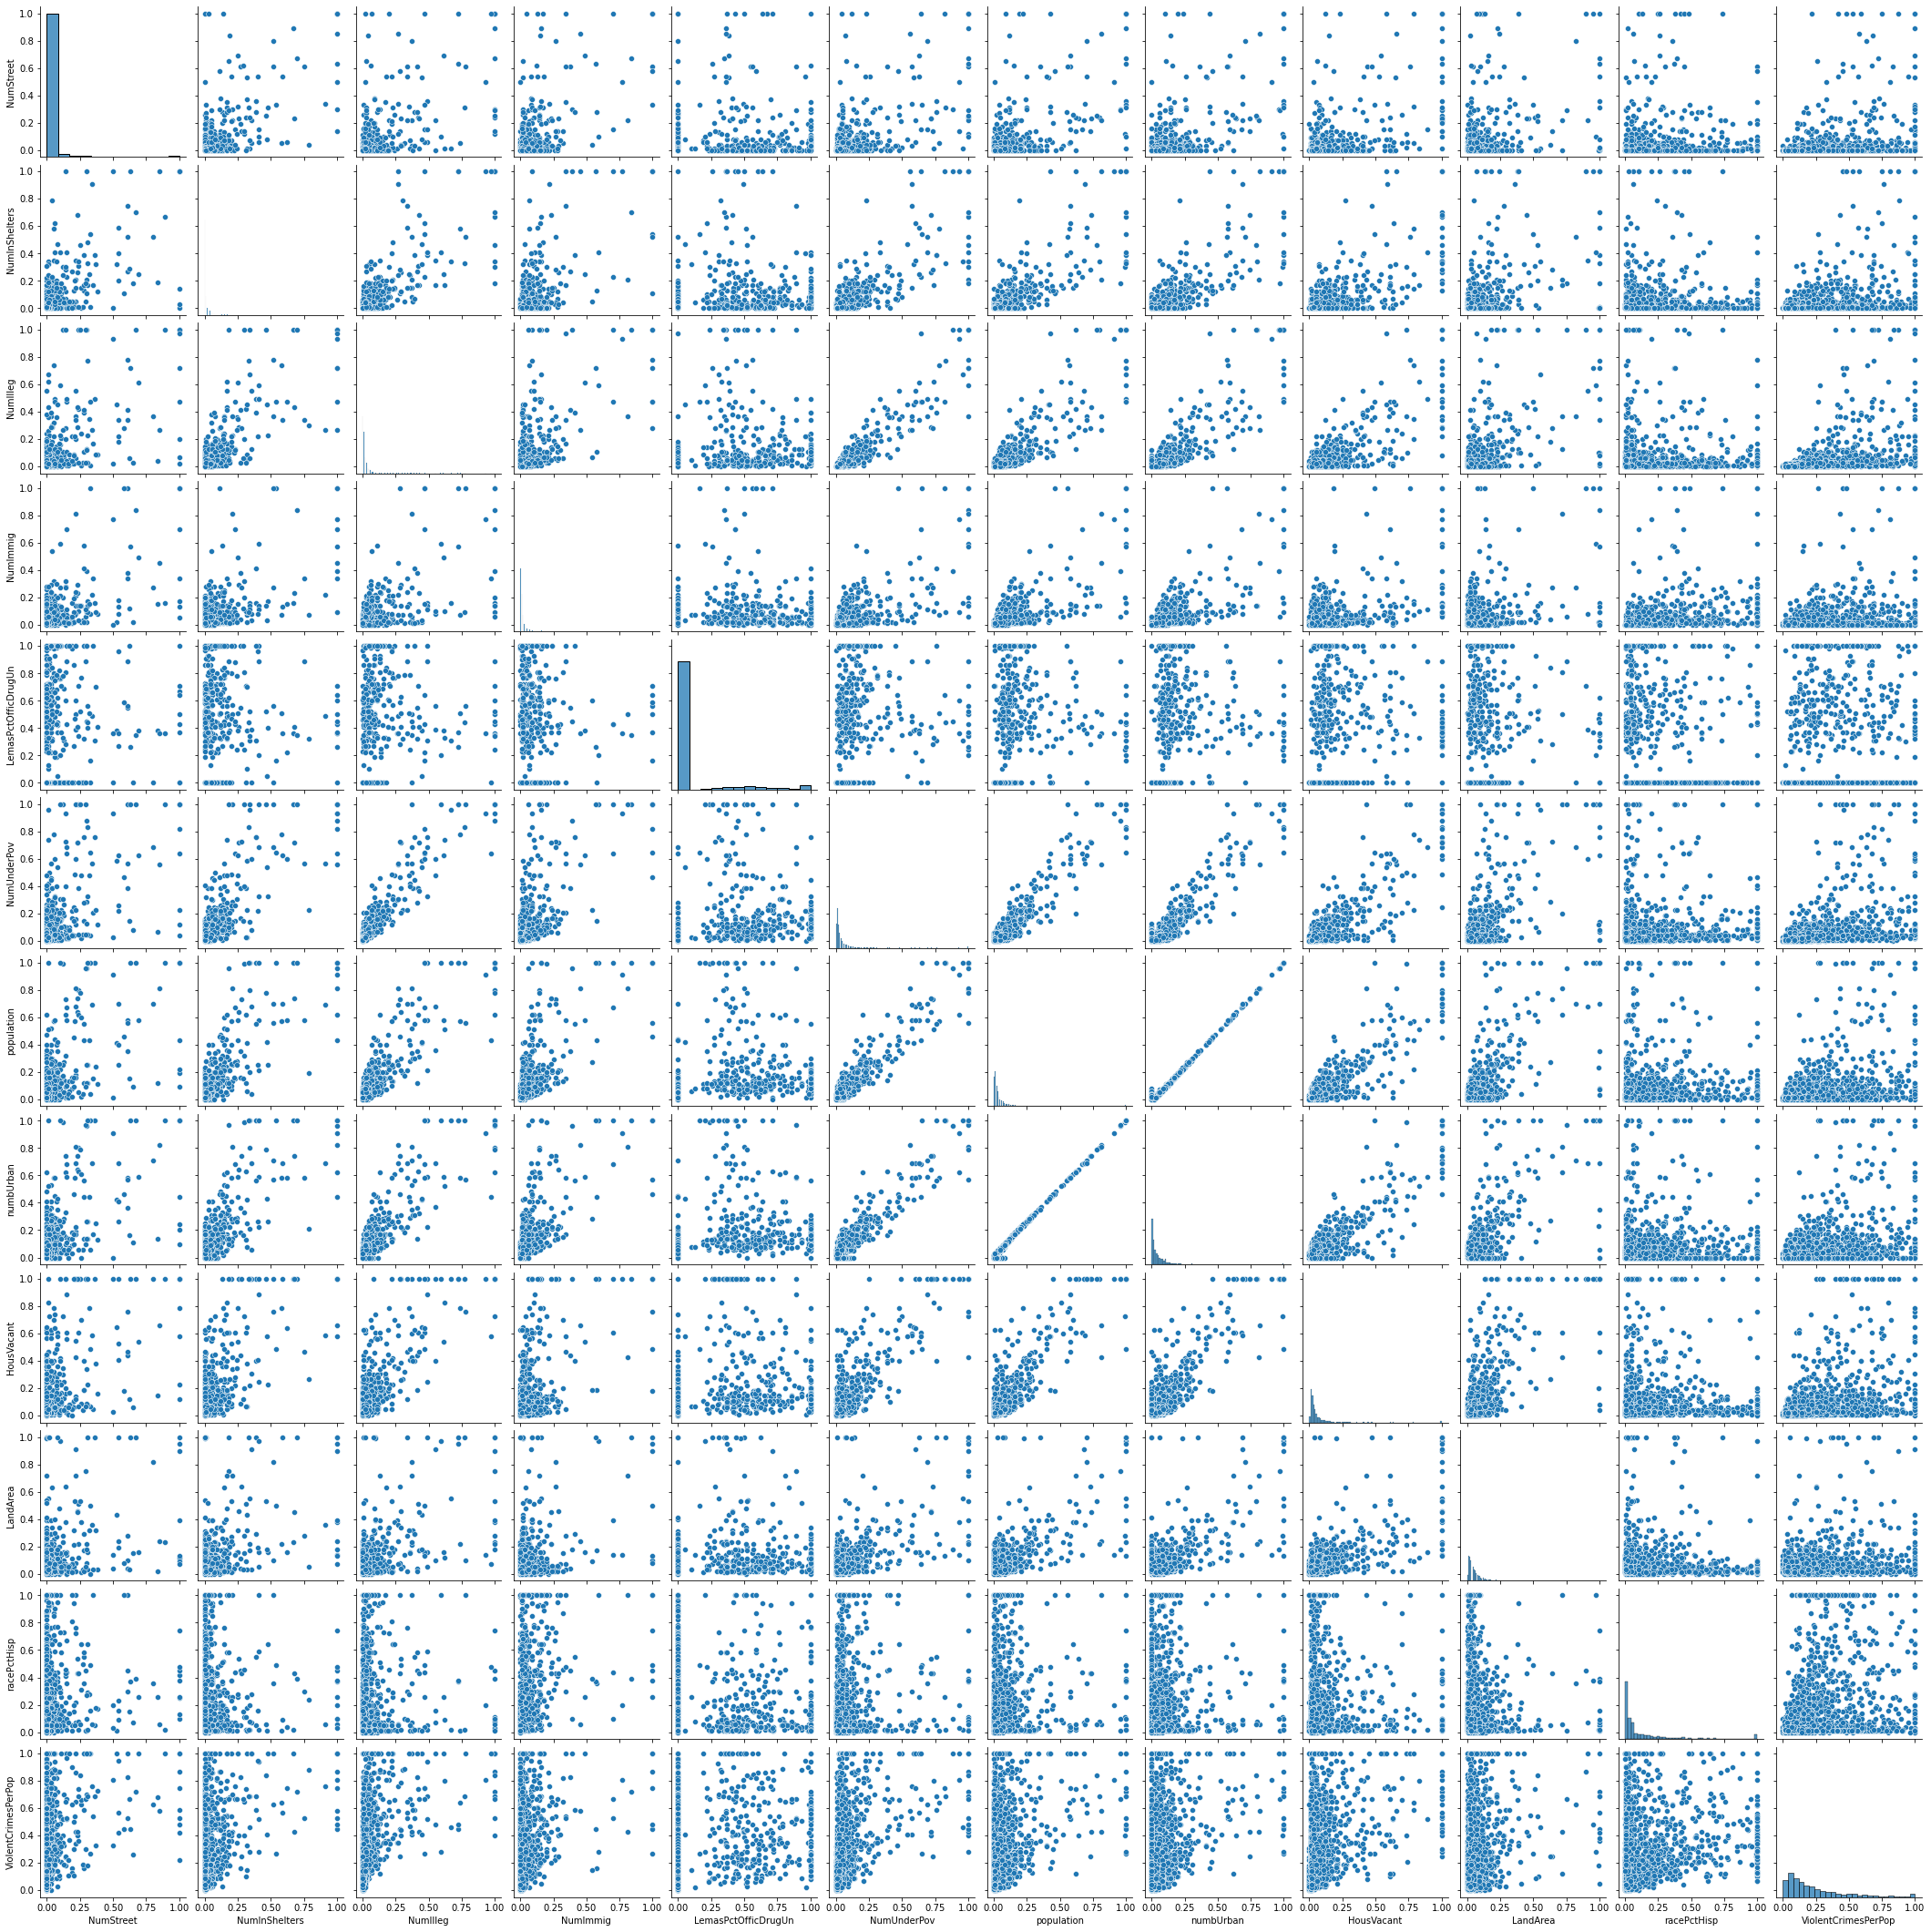

In [109]:
selected_column = cv[:11].index.to_list()
selected_column.append('ViolentCrimesPerPop')
plot = sns.pairplot(data=data_imputed_df, vars=selected_column, kind='scatter')

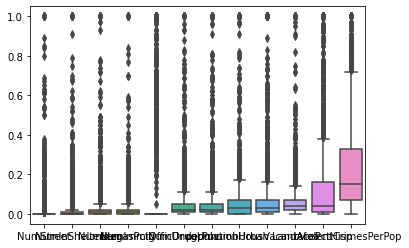

In [78]:
plot = sns.boxplot(data=data_imputed_df[selected_column])

# It is hard to draw any conclusions about significance of these features just by the scatter plots. But, according to the correlation matrix, racePctWhite, PctKids2par and PctIlleg are significantly related to ViolentCrimesPop. According to the scatter plot, population and numbUrban have a very strong corelation.

(f) Fit a linear model using least squares to the training set and report the test error.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

all_data = data_imputed_df
# all_data = data_imputed_df[selected_column]
train, test = all_data[:1495], all_data[1495:]
train_x, test_x = train.drop(['ViolentCrimesPerPop'], axis=1), test.drop(['ViolentCrimesPerPop'], axis=1)
train_y, test_y = train['ViolentCrimesPerPop'], test['ViolentCrimesPerPop']
# train_x

lr = LinearRegression()
lr.fit(train_x, train_y)
pred_y = lr.predict(test_x)
print('R-Square: ', lr.score(test_x,test_y))
print('test error of linear regression using least squares is', metrics.mean_squared_error(test_y,pred_y))

R-Square:  -15.606466950727668
test error of linear regression using least squares is 0.7897255274323255


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation.
Report the test error obtained.

In [8]:
from sklearn.linear_model import RidgeCV
rc=RidgeCV(alphas=[0.01,0.1,1,3,5,10,30,100,200])
rc.fit(train_x, train_y)
pred_y = rc.predict(test_x)
print('R-Square: ', rc.score(test_x,test_y))
print('with λ=', rc.alpha_, 'test error of ridge regression model is', metrics.mean_squared_error(test_y,pred_y))

R-Square:  0.6306367361024912
with λ= 3.0 test error of ridge regression model is 0.01756518103827038


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized2
features. Report the test error for both cases and
compare them.

In [9]:
from sklearn.linear_model import LassoCV

lc=LassoCV(alphas=[0.001,0.01,0.1,1,3,5,10,30,100,200])
lc.fit(train_x, train_y)
pred_y = lc.predict(test_x)
print('R-Square: ', lc.score(test_x,test_y))
print('with λ=', lc.alpha_, 'test error of LASSO model is', metrics.mean_squared_error(test_y,pred_y))
feature_selected_by_lasso=[]
for i in range(len(lc.coef_)):
    if lc.coef_[i]!=0:
        feature_selected_by_lasso.append(train_x.columns[i])
print(len(feature_selected_by_lasso), 'features are selected, they are:', feature_selected_by_lasso)

R-Square:  0.6310550538601053
with λ= 0.001 test error of LASSO model is 0.01754528781156862
23 features are selected, they are: ['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban', 'pctWPubAsst', 'AsianPerCap', 'MalePctDivorce', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctRecImmig10', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn']


In [12]:
from sklearn.preprocessing import StandardScaler

standard=StandardScaler()
train_x_standard, test_x_standard = standard.fit_transform(train_x), standard.fit_transform(test_x)
lc=LassoCV(alphas=[0.001,0.01,0.1,1,3,5,10,30,100,200])
lc.fit(train_x_standard, train_y)
pred_y = lc.predict(test_x_standard)
print('R-Square: ', lc.score(test_x_standard,test_y))
print('with standardized features, with λ=', lc.alpha_, 'test error of LASSO model is', metrics.mean_squared_error(test_y,pred_y))
feature_selected_by_lasso=[]
for i in range(len(lc.coef_)):
    if lc.coef_[i]!=0:
        feature_selected_by_lasso.append(train_x.columns[i])
print(len(feature_selected_by_lasso), 'features are selected, they are:', feature_selected_by_lasso)

R-Square:  0.622438475885954
with standardized features, with λ= 0.001 test error of LASSO model is 0.017955051767110063
68 features are selected, they are: ['racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 

# copare standized and unstandized data, the unstandized data get a lower MSE

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [11]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings("ignore")
best_score=1
best_test_error=1
best_n=1
for n in range(1,123):
    pcr = make_pipeline(StandardScaler(), PCA(n_components=n), LinearRegression())
    pcr.fit(train_x, train_y)
    cv_score = cross_val_score(pcr, train_x, train_y, cv=3, scoring='neg_mean_squared_error')
    # print(cv_score)
    mean_score = -np.mean(cv_score)

    pred_y = pcr.predict(test_x)
    test_error = metrics.mean_squared_error(test_y,pred_y)
    # print(n, 'mse', mean_score,'test mse', test_error)
    if mean_score<best_score:
        best_score = mean_score
        best_test_error = test_error
        best_n = n

print('')
print('when M (the number of principal components) =', best_n, ', best test error of PCR model is', best_test_error)


when M (the number of principal components) = 51 , best test error of PCR model is 0.018524740713229144


(j) In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized
gradient boosting tree. You can use XGBoost3
to fit the model tree. Determine
α (the regularization term) using cross-validation.

In [116]:
import xgboost as xgb

# all_data = data_imputed_df[selected_column]
all_data = data_imputed_df
train, test = all_data[:1495], all_data[1495:]
train_x, test_x = train.drop(['ViolentCrimesPerPop'], axis=1), test.drop(['ViolentCrimesPerPop'], axis=1)
train_y, test_y = train['ViolentCrimesPerPop'], test['ViolentCrimesPerPop']

dtrain=xgb.DMatrix(train_x, label=train_y)
dtest=xgb.DMatrix(test_x, label=test_y)

alphas=[0.01,0.1,1,3,5,10,30,100,200]
best_score=1
for a in alphas:
    param={'alpha':a}
    model = xgb.train(params=param, dtrain=dtrain)
    pred = model.predict(dtrain)
    score = metrics.mean_squared_error(train_y,pred)
    # print(a, score)
    if score<best_score:
        best_score=score
        best_a=a

model = xgb.train(params={'alpha':best_a}, dtrain=dtrain)
pred_y = model.predict(dtest)
print('when a=', best_a, 'best test error is: ', metrics.mean_squared_error(test_y,pred_y))

when a= 0.1 best test error is:  0.018293839207334024


2.Tree-Based Methods

(a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/
APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test
set. The training set contains 60,000 rows, of which 1,000 belong to the positive
class and 171 columns, of which one is the class column. All attributes are numeric.

In [100]:
train_data = pd.read_csv('../data/Homework 4 Data/aps_failure_training_set.csv',skiprows=20)
test_data = pd.read_csv('../data/Homework 4 Data/aps_failure_test_set.csv',skiprows=20)

(b) Data Preparation
This data set has missing values. When the number of data with missing values
is significant, discarding them is not a good idea. 4

i. Research what types of techniques are usually used for dealing with data with
missing values.5 Pick at least one of them and apply it to this data in the
next steps.6

1. imputation Using (Mean/Median) Values
2. imputation Using (Most Frequent) or (Zero/Constant) Values
3. use some model to predict the missing value

In [101]:
train_data=train_data.replace('na',np.nan)
test_data=test_data.replace('na',np.nan)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
train_y = train_data['class']
train_x = train_data.drop(['class'], axis=1)
test_y = test_data['class']
test_x = test_data.drop(['class'], axis=1)

column_names = train_x.columns
train_x = imp.fit_transform(train_x)
test_x = imp.fit_transform(test_x)
train_x = pd.DataFrame(train_x, columns=column_names)
test_x = pd.DataFrame(test_x, columns=column_names)
train_x
# test_x

aa_000    ab_000        ac_000         ad_000  ae_000  af_000  \
0       76698.0  0.713189  2.130706e+09     280.000000     0.0     0.0   
1       33058.0  0.713189  0.000000e+00  190620.639314     0.0     0.0   
2       41040.0  0.713189  2.280000e+02     100.000000     0.0     0.0   
3          12.0  0.000000  7.000000e+01      66.000000     0.0    10.0   
4       60874.0  0.713189  1.368000e+03     458.000000     0.0     0.0   
...         ...       ...           ...            ...     ...     ...   
59995  153002.0  0.713189  6.640000e+02     186.000000     0.0     0.0   
59996    2286.0  0.713189  2.130707e+09     224.000000     0.0     0.0   
59997     112.0  0.000000  2.130706e+09      18.000000     0.0     0.0   
59998   80292.0  0.713189  2.130706e+09     494.000000     0.0     0.0   
59999   40222.0  0.713189  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ag_003  ...     ee_002    ee_003     ee_004  \
0         0.0     0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   
1         0.0     0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   
2         0.0     0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   
3         0.0     0.0     0.0   318.0  ...      240.0      46.0       58.0   
4         0.0     0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   
...       ...     ...     ...     ...  ...        ...       ...        ...   
59995     0.0     0.0     0.0  2564.0  ...   998500.0  566884.0  1290398.0   
59996     0.0     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0   
59997     0.0     0.0     0.0     0.0  ...      792.0     386.0      452.0   
59998     0.0     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   
59999     0.0     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   

          ee_005     ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       469792.0   339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       245416.0   133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       409564.0   320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           44.0       10.0       0.0       0.0       0.0     4.0    32.0  
4       347188.0   286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...        ...       ...       ...       ...     ...     ...  
59995  1218244.0  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996    68424.0      136.0       0.0       0.0       0.0     0.0     0.0  
59997      144.0      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   225724.0   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   254068.0   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 170 columns]

ii. For each of the 170 features, calculate the coefficient of variation CV = sm,
where s is sample standard deviation and m is sample mean.

In [120]:
cv=train_x.std()/train_x.mean()
cv

aa_000      2.450938
ab_000      2.328400
ac_000      2.169767
ad_000    183.847620
ae_000     23.190937
             ...    
ee_007      4.962483
ee_008      3.222010
ee_009      5.626979
ef_000     47.124953
eg_000     40.553250
Length: 170, dtype: float64

iii. Plot a correlation matrix for your features using pandas or any other tool.

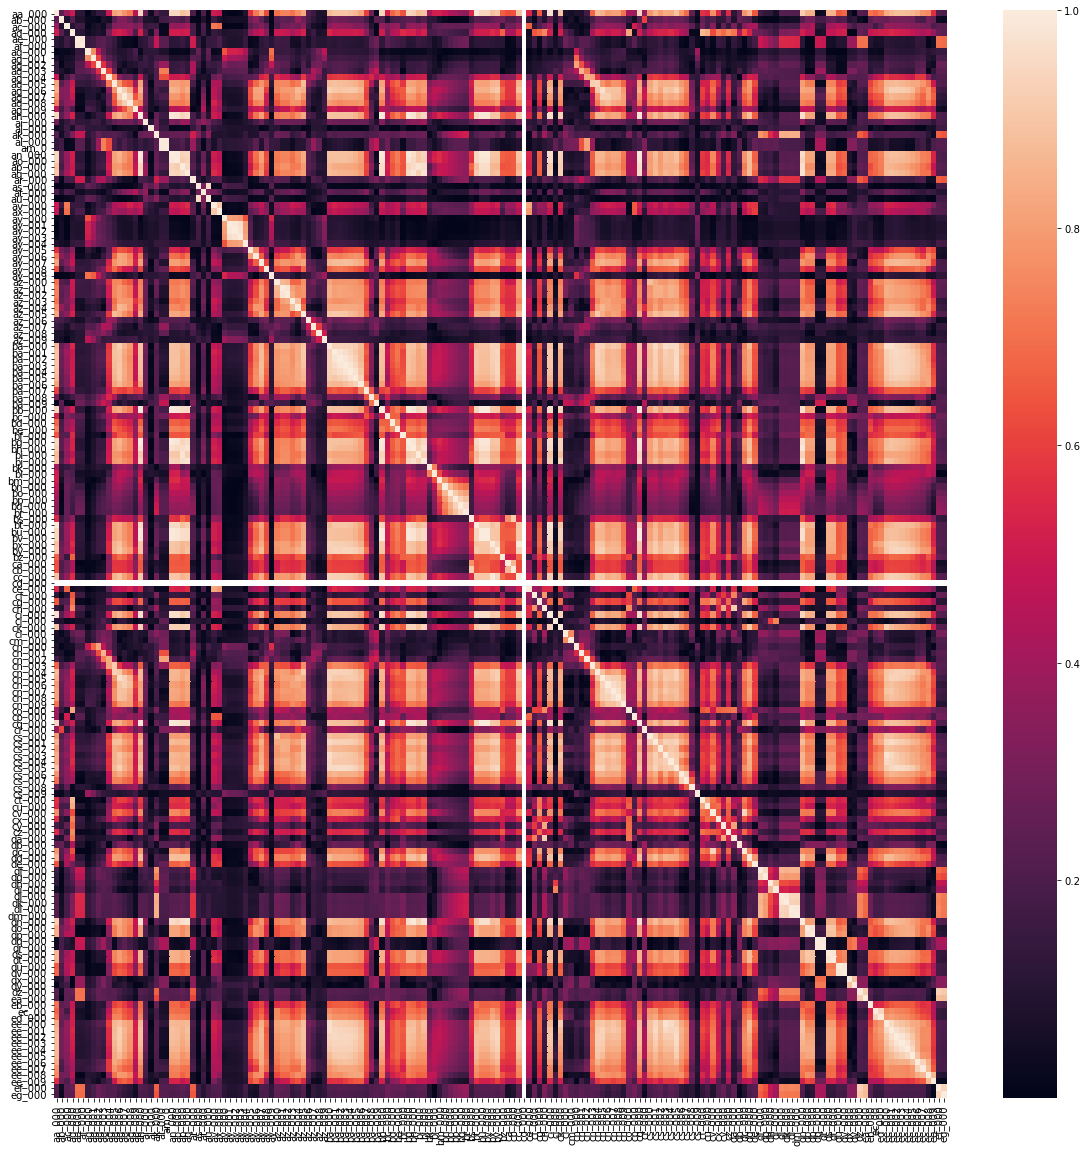

In [127]:
# train_x.corr()
matrix=train_x.corr(method='spearman')
matrix=abs(matrix)
plt.figure(figsize=(20,20))
plot=sns.heatmap(matrix, xticklabels=matrix.columns, yticklabels=matrix.columns)
plt.show()

iv. Pick b√
170c features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots? This does not mean
that you will only use those features in the following questions. We picked
them only for visualization.

In [89]:
170**0.5

13.038404810405298

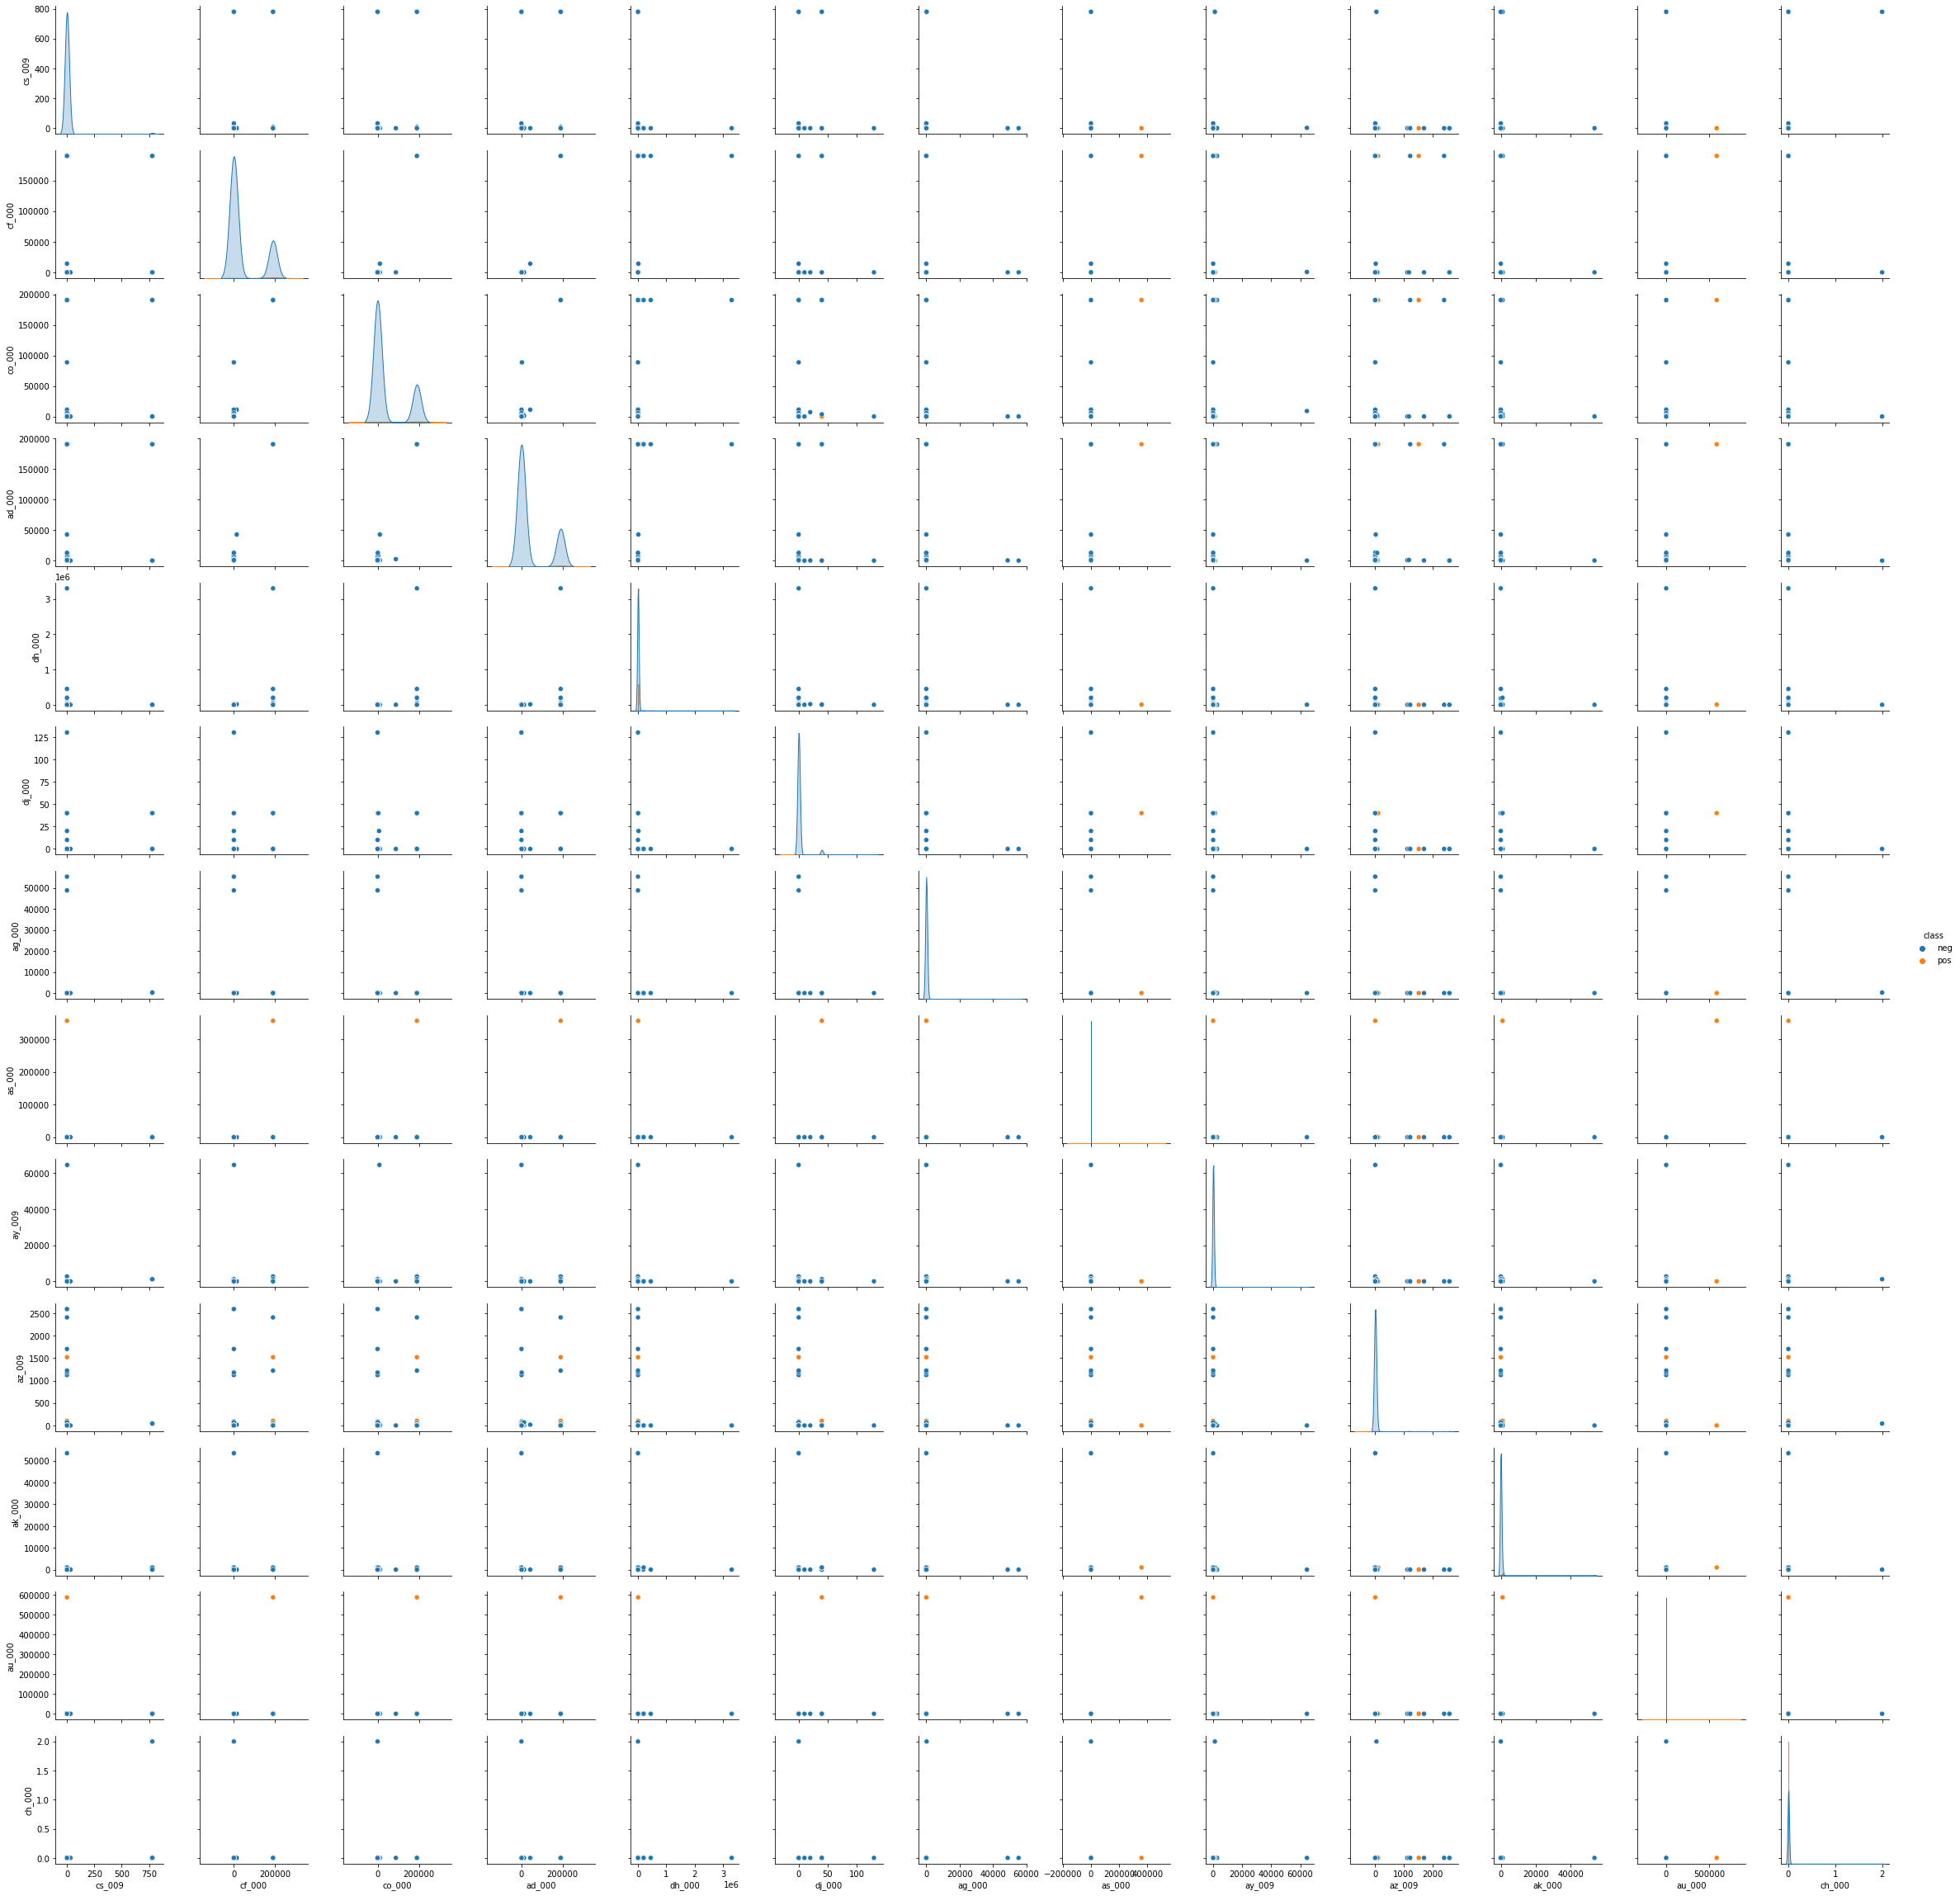

In [98]:
cv=cv.sort_values(ascending=False)[:13]
selected_column = cv.index.to_list()
selected_column.append('class')
train_data = pd.concat([train_x, train_y], axis=1)
train_data[selected_column]
plot = sns.pairplot(data=train_data[selected_column].sample(1000), vars=cv.index.to_list(), kind='scatter',hue='class')

# according to the scatter plots, au_000 and as_000 are significant, however, this result may be caused by outliers, which is not accuracy.

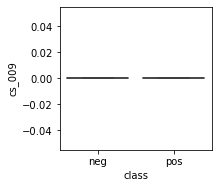

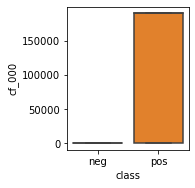

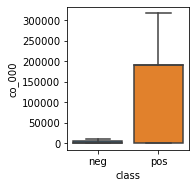

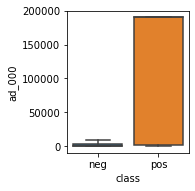

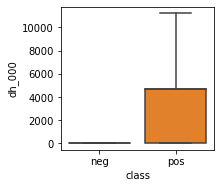

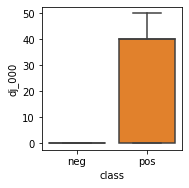

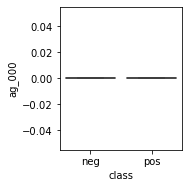

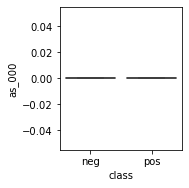

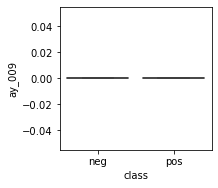

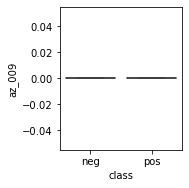

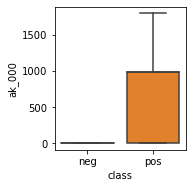

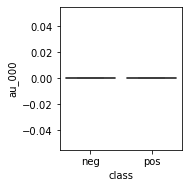

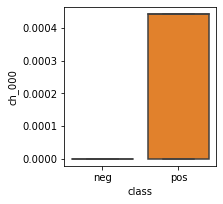

In [91]:
import matplotlib.pyplot as plt

cnt=0
for y in cv.index.to_list():
    cnt+=1
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(4, 4, cnt)
    sns.boxplot(data=train_data, x='class', y=y, showfliers=False)
    plt.tight_layout()
    plt.show()

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [133]:
train_y.value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [131]:
test_y.value_counts()

neg    15625
pos      375
Name: class, dtype: int64

# the dataset is imbalanced, there are too much negative data compared to pos data.

(c) Train a random forest to classify the data set. Do NOT compensate for class
imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error.

# matrix, ROC, AUC, and misclassification are showed in the output, the oob error is almostly equal to test error.

In [106]:
from sklearn.ensemble import RandomForestClassifier

train_y2=train_y.replace('neg',0).replace('pos',1)
test_y2=test_y.replace('neg',0).replace('pos',1)
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, oob_score=True)
# Fit on training data
model.fit(train_x, train_y2)
print('train misclassification is:', 1-model.score(train_x, train_y2), ' Out of Bag error estimate: ', 1-model.oob_score_)

train misclassification is: 0.0  Out of Bag error estimate:  0.006366666666666632


In [108]:
from sklearn.metrics import f1_score

# Actual class predictions
rf_predictions = model.predict(test_x)
rf_predictions_train = model.predict(train_x)
# Probabilities for each class
rf_probs = model.predict_proba(test_x)[:, 1]
rf_probs_train = model.predict_proba(train_x)[:, 1]
print('test misclassification is:', 1-model.score(test_x, test_y2))

test misclassification is: 0.00824999999999998


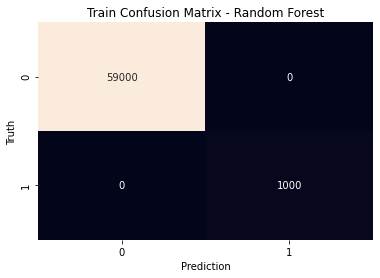

74


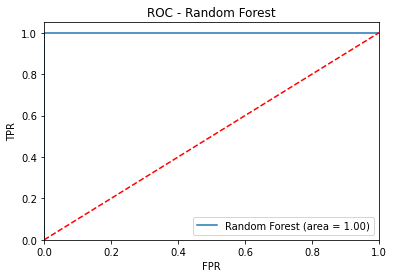

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion(truth, pred, title, data_type):
    conf_mat = confusion_matrix(truth, pred)
    ax= plt.subplot()
    sns.heatmap(conf_mat, annot=True, cbar= False, ax = ax, fmt='.20g')
    plt.title(data_type+' Confusion Matrix - '+title)
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show()

def plot_roc(truth, pred, title):
    roc_auc = roc_auc_score(truth, pred)
    fp_rate, tp_rate, thresholds = roc_curve(truth, pred)
    # print(len(fp_rate))
    plt.figure()
    plt.plot(fp_rate, tp_rate, label=title+' (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC - '+title)
    plt.legend(loc="lower right")
    plt.show()

plot_confusion(train_y2, rf_predictions_train, 'Random Forest', 'Train')
plot_roc(train_y2, rf_probs_train, 'Random Forest')

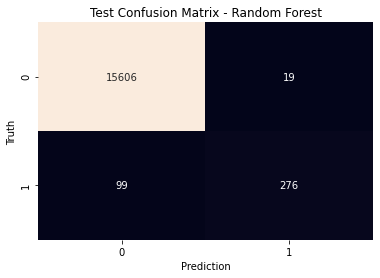

98


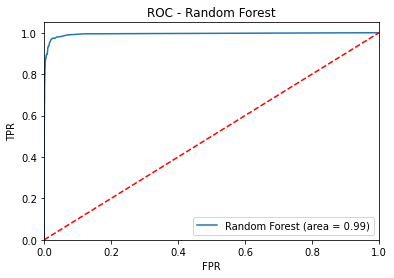

In [23]:
plot_confusion(test_y2, rf_predictions, 'Random Forest', 'Test')
plot_roc(test_y2, rf_probs, 'Random Forest')

(d) Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 2c. Compare the results with
those of 2c.

# The first technique is to weight the tree splitting criterion; the other technique is to either oversample or undersample data points during the bootstrap sampling process. Compared to the results in 2c, the oob error is reduced, but the test misclassification increased.

In [104]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
sampled_train_x, sampled_train_y = ros.fit_resample(train_x, train_y2)

In [105]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, oob_score=True)
# Fit on training data
model.fit(sampled_train_x, sampled_train_y)
print('train misclassification is:', 1-model.score(sampled_train_x, sampled_train_y), ' Out of Bag error estimate: ', 1-model.oob_score_)

# Actual class predictions
rf_predictions = model.predict(test_x)
rf_predictions_train = model.predict(sampled_train_x)
# Probabilities for each class
rf_probs = model.predict_proba(test_x)[:, 1]
rf_probs_train = model.predict_proba(sampled_train_x)[:, 1]

print('test misclassification is:', 1-model.score(test_x, test_y2))

train misclassification is: 0.0  Out of Bag error estimate:  0.0010000000000000009
test misclassification is: 0.009499999999999953


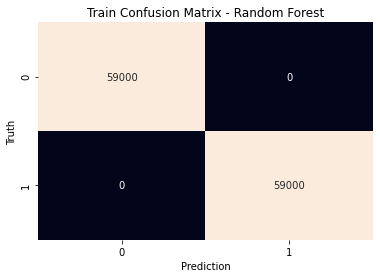

36


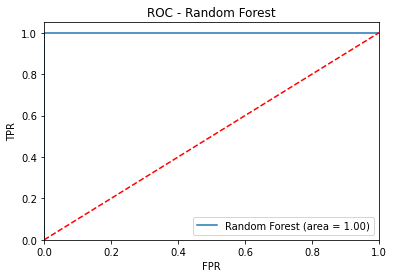

In [26]:
plot_confusion(sampled_train_y, rf_predictions_train, 'Random Forest', 'Train')
plot_roc(sampled_train_y, rf_probs_train, 'Random Forest')

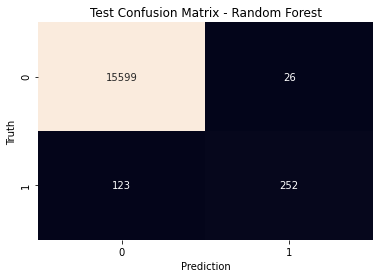

98


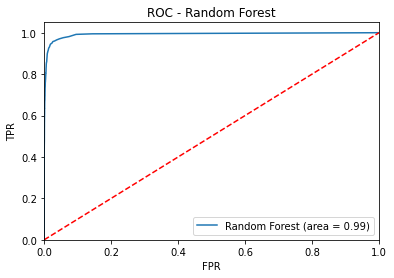

In [27]:
plot_confusion(test_y2, rf_predictions, 'Random Forest', 'Test')
plot_roc(test_y2, rf_probs, 'Random Forest')

(e) Model Trees
In the case of a univariate tree, only one input dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can
be used and thus it is more general. In univariate classification trees, majority
polling is used at each node to determine the split of that node as the decision
rule. In model trees, a (linear) model that relies on all of the variables is used
to determine the split of that node (i.e. instead of using Xj > s as the decision
rule, one has Pj βjXj > s. as the decision rule). Alternatively, in a regression
tree, instead of using average in the region associated with each node, a linear
regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. One
can use scikit learn to call Weka7
to train Logistic Model Trees for classification.
Train Logistic Model Trees for the APS data set without compensation for class
imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods
to estimate the error of your trained model and compare it with the test error.
Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [28]:
import weka.core.jvm as jvm
import weka.core.converters as converters
from weka.classifiers import Classifier
from weka.classifiers import Evaluation
from weka.core.classes import Random

train = train_x
train['class'] = train_y
test = test_x
test['class'] = test_y
train.to_csv('trainData.csv',index=False)
test.to_csv('testData.csv', index=False)

In [2]:
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/home/zhaoxudong/anaconda3/lib/python3.8/site-packages/javabridge/jars/rhino-1.7R4.jar', '/home/zhaoxudong/anaconda3/lib/python3.8/site-packages/javabridge/jars/runnablequeue.jar', '/home/zhaoxudong/anaconda3/lib/python3.8/site-packages/javabridge/jars/cpython.jar', '/home/zhaoxudong/anaconda3/lib/python3.8/site-packages/weka/lib/weka.jar', '/home/zhaoxudong/anaconda3/lib/python3.8/site-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [29]:
# use weka to read data
trainDataWeka = converters.load_any_file('trainData.csv')
trainDataWeka.class_is_last()
# build model and train it with train set
cls = Classifier(classname="weka.classifiers.trees.LMT",options=["-B"])
evl = Evaluation(trainDataWeka)
# choose cv = 5
evl.crossvalidate_model(cls, trainDataWeka, 5, Random(1))
print(evl.summary())
print(evl.class_details())


Correctly Classified Instances       59511               99.185  %
Incorrectly Classified Instances       489                0.815  %
Kappa statistic                          0.7323
Mean absolute error                      0.0107
Root mean squared error                  0.0828
Relative absolute error                 32.7309 %
Root relative squared error             64.6569 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.317    0.995      0.997    0.996      0.735    0.944     0.996     neg
                 0.683    0.003    0.799      0.683    0.736      0.735    0.944     0.731     pos
Weighted Avg.    0.992    0.312    0.991      0.992    0.992      0.735    0.944     0.992     



Train Set Confusion Matrix:
[[58828.   172.]
 [  317.   683.]]


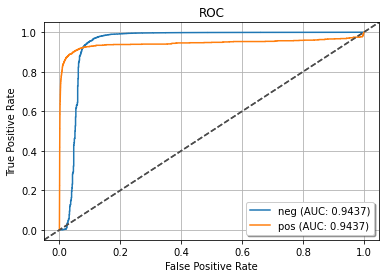

In [30]:
# calculate confusion matrix
print('Train Set Confusion Matrix:')
print(evl.confusion_matrix)

# draw ROC and AUC
import weka.plot.classifiers as plcls
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

In [31]:
# build to model to predict test set
cls.build_classifier(trainDataWeka)

testDataWeka = converters.load_any_file('testData.csv')
testDataWeka.class_is_last()

evl.test_model(cls, testDataWeka)
print('Test Set Result')
print(evl.summary())
print(evl.class_details())

Test Set Result

Correctly Classified Instances       75357               99.1539 %
Incorrectly Classified Instances       643                0.8461 %
Kappa statistic                          0.7429
Mean absolute error                      0.0112
Root mean squared error                  0.084 
Relative absolute error                 32.8116 %
Root relative squared error             63.0563 %
Total Number of Instances            76000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.309    0.994      0.997    0.996      0.745    0.952     0.997     neg
                 0.691    0.003    0.813      0.691    0.747      0.745    0.952     0.747     pos
Weighted Avg.    0.992    0.304    0.991      0.992    0.991      0.745    0.952     0.992     



Test Set Confusion Matrix:
[[74407.   218.]
 [  425.   950.]]


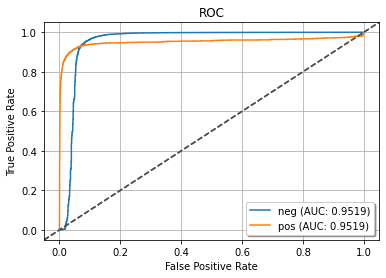

In [32]:
# calculate confusion matrix
print('Test Set Confusion Matrix:')
print(evl.confusion_matrix)

# draw ROC and AUC
import weka.plot.classifiers as plcls
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
data to compensate for class imbalance.8 Train a Logistic Model Tree using the
pre-processed data and repeat 2e. Do not forget that there is a right and a wrong
way of cross validation here. Compare the uncompensated case with SMOTE.

In [74]:
train_y=train_y.replace('neg',0.0).replace('pos',1.0)

In [77]:
from imblearn.over_sampling import SMOTE
# resample train set
sm = SMOTE(random_state=42)

smoteXTrain, smoteYTrain = sm.fit_resample(train_x, train_y)
smoteTrain = pd.DataFrame(smoteXTrain)
smoteYTrain = smoteYTrain.replace(0.0,'neg').replace(1.0,'pos')
smoteTrain['class'] = smoteYTrain


smoteTrain.to_csv('smoteTrainData.csv',index=False)
# use weka to read data
smoteTrainDataWeka = converters.load_any_file('smoteTrainData.csv')
# set class column
smoteTrainDataWeka.class_is_last()

# cls = Classifier(classname='weka.classifiers.trees.J48',options=['-C', '0.3'])
cls = Classifier(classname="weka.classifiers.trees.LMT",options=["-B"])
evl = Evaluation(smoteTrainDataWeka)
# choose cv = 5
evl.crossvalidate_model(cls, smoteTrainDataWeka, 5, Random(1))
print(evl.summary())
print(evl.class_details())


Correctly Classified Instances      116275               98.5381 %
Incorrectly Classified Instances      1725                1.4619 %
Kappa statistic                          0.9708
Mean absolute error                      0.0239
Root mean squared error                  0.1112
Relative absolute error                  4.7765 %
Root relative squared error             22.238  %
Total Number of Instances           118000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.984    0.013    0.987      0.984    0.985      0.971    0.996     0.995     neg
                 0.987    0.016    0.984      0.987    0.985      0.971    0.996     0.993     pos
Weighted Avg.    0.985    0.015    0.985      0.985    0.985      0.971    0.996     0.994     



SMOTE Train Set Confusion Matrix:
[[58051.   949.]
 [  776. 58224.]]


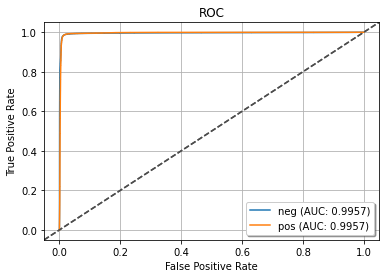

In [78]:
# calculate confusion matrix
print('SMOTE Train Set Confusion Matrix:')
print(evl.confusion_matrix)

# draw ROC and AUC
import weka.plot.classifiers as plcls
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

In [81]:
# resample test set
sm = SMOTE()
test_y=test_y.replace('neg',0.0).replace('pos',1.0)
smoteXTest, smoteYTest = sm.fit_resample(test_x, test_y)
smoteTest = pd.DataFrame(smoteXTest)
smoteYTest = smoteYTest.replace(0.0,'neg').replace(1.0,'pos')
smoteTest['class'] = smoteYTest

smoteTest.to_csv('smoteTestData.csv',index=False)
# use weka to read data, required index=False
smoteTestDataWeka = converters.load_any_file('smoteTestData.csv')
# set class column
smoteTestDataWeka.class_is_last()

# build to model to predict
cls.build_classifier(smoteTrainDataWeka)
print('SMOTE Test Set Result')
evl.test_model(cls, smoteTestDataWeka)
print(evl.summary())
print(evl.class_details())

SMOTE Test Set Result

Correctly Classified Instances      146256               97.994  %
Incorrectly Classified Instances      2994                2.006  %
Kappa statistic                          0.9599
Mean absolute error                      0.0291
Root mean squared error                  0.1331
Relative absolute error                  5.828  %
Root relative squared error             26.6108 %
Total Number of Instances           149250     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.983    0.023    0.977      0.983    0.980      0.960    0.987     0.977     neg
                 0.977    0.017    0.983      0.977    0.980      0.960    0.987     0.985     pos
Weighted Avg.    0.980    0.020    0.980      0.980    0.980      0.960    0.987     0.981     



SMOTE Test Set Confusion Matrix:
[[73365.  1260.]
 [ 1734. 72891.]]


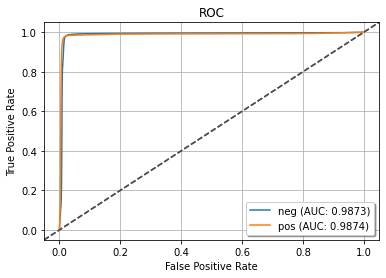

In [82]:
# calculate confusion matrix
print('SMOTE Test Set Confusion Matrix:')
print(evl.confusion_matrix)

# draw ROC and AUC
import weka.plot.classifiers as plcls
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

# Compre with uncompensated data set, model performs better on SMOTE data and get higher AUC score and accuracy.

3. ISLR 6.6.3

(a) iv. Steadily decrease. Because all betas increase from 0 to their least square estimate values. Train error steadily decrease to ordinary least square RSS.

(b) ii. Decrease initially, and then eventually start increasing in a U shape. before the model is overfit, the test RSS is the same as train, but after that, beta they start overfitting the train data, increasing test RSS.

(c) iii. Steadily increase. when betas are 0, the model return a constant and has no variance, when s increases, the values of betas become highly dependent on training data, thus increasing the variance.

(d) iv. Steadily decrease. when betas are 0, the model return a constant and bias is high, when s increases, betas become non-zero, so bias decrease.

(e) v.Remain constant. Irreducible error is independant of the model, it is irrelevant with s.

4. ISLR, 6.6.5 (link:Page1.jpg)

![avatar](Page1.jpg)


5. ISLR, 8.4.5 (link:Page2.jpg)

![avatar](Page2.jpg)

6. ISLR 9.7.3

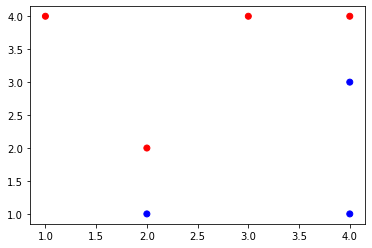

In [28]:
# (a) sketch the observations
import matplotlib.pyplot as plt
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
color = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']
plt.figure()
plt.scatter(x1, x2, c = color)
plt.show()

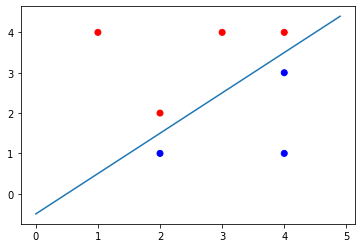

x2=x1-0.5


In [29]:
# b 
import numpy as np
plt.figure()
plt.scatter(x1, x2, c = color)
x = np.arange(0, 5, 0.1)
y=x-0.5
plt.plot(x,y)
plt.show()
print('x2=x1-0.5')

(c) if x1-x2-0.5<0 classify to red, else classify to blue

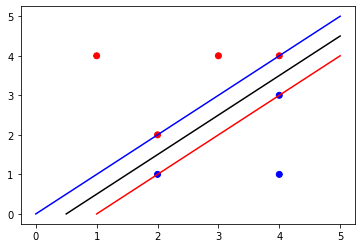

In [30]:
# (d)
plt.plot([0.5, 5], [0, 4.5],'black')
plt.plot([0,5],[0,5], 'blue')
plt.plot([1,5],[0,4], 'red')
plt.scatter(x1, x2, c = color)
plt.show()

(e) The support vectors are points(2,1),(2,2),(4,3) and (4,4)

(f) a slight movement of the point(4,1) would not change the maximal margin hyperplane.

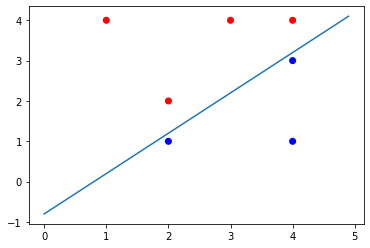

x2=x1-0.8


In [35]:
# (g)
plt.figure()
plt.scatter(x1, x2, c = color)
x = np.arange(0, 5, 0.1)
y=x-0.8
plt.plot(x,y)
plt.show()
print('x2=x1-0.8')

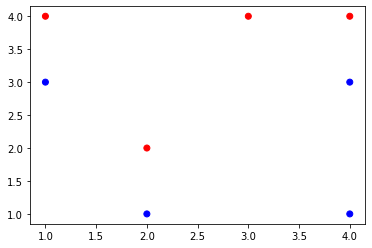

In [26]:
#(h) Add a blue point(1,1)
x1 = [3, 2, 4, 1, 2, 4, 4, 1]
x2 = [4, 2, 4, 4, 1, 3, 1, 3]
color = ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue']
plt.figure()
plt.scatter(x1, x2, c = color)
plt.show()